In [13]:
from __future__ import division
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [38]:
citys=pd.read_table('./data/tsp100.txt',sep='\t',header=None)
citys.columns=['x']
citys['y']=None

for i in range(len(citys)):
    coordinate=citys['x'][i].split()
    citys['x'][i]=float(coordinate[0])
    citys['y'][i]=float(coordinate[1])
 
citys = citys.head(45)

In [39]:
# -*- coding: utf-8 -*-
"""
utils
"""
import math
def CalDistance(x,y):
    return math.sqrt(x**2+y**2)

def CalLength(citys, paths,start,end):
    length=0
    n=1
    for i in range(len(paths)):
        if i==0:
            length+=CalDistance(start[0]-citys['x'][paths[i]],start[1]-citys['y'][paths[i]])
            n+=1
        elif n<len(paths):
            length+=CalDistance(citys['x'][paths[i]]-citys['x'][paths[i+1]],citys['y'][paths[i]]-citys['y'][paths[i+1]])
            n+=1
        else:
            length+=CalDistance(citys['x'][paths[i]]-end[0],citys['y'][paths[i]]-end[1])
    return length




In [40]:
start=list(citys.iloc[0])
end=list(citys.iloc[0])
citys=citys.drop([0])
citys.index=[i for i in range(len(citys))]

paths=[i for i in range(len(citys))]# initiate path

#random path and calculate distance to sreach for optimal initiate temperature


distance1=0
distance2=0
dif=0
for i in range(10):  
    #np.random.shuffle(path)
    newPaths1=list(np.random.permutation(paths))
    newPaths2=list(np.random.permutation(paths))
    distance1=CalLength(citys,newPaths1,start,end)
    distance2=CalLength(citys,newPaths2,start,end)
    difNew=abs(distance1-distance2)
    if difNew>=dif:
        dif=difNew

11118.941182181325


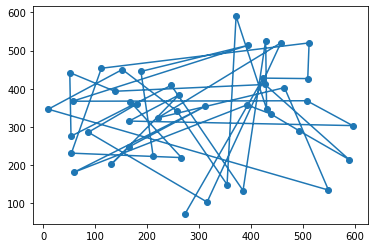

In [41]:
Pr=0.5 #initiate accept possibility
T0=dif/Pr#initiate terperature
T=T0
Tmin=T/50
k=10*len(paths) #times of internal circulation
initialPath=paths.copy()
length=CalLength(citys,initialPath,start,end)
print (length)

t=0 #time  
plt.scatter(citys['x'],citys['y'])
plt.plot(citys['x'],citys['y']) 

In [42]:
initialPath=list(np.random.permutation(paths))
length=CalLength(citys,initialPath,start,end)
optimalPath = initialPath.copy()
optimalLength=length
t=0
while T>Tmin:
    for i in range(k):
        newPaths=optimalPath.copy()
        for j in range(int(T0/500)):
            a=0
            b=0
            while a==b:
                a=np.random.randint(0,len(paths))
                b=np.random.randint(0,len(paths))
            te=newPaths[a]
            newPaths[a]=newPaths[b]
            newPaths[b]=te
        newLength=CalLength(citys,newPaths,start,end)
        if newLength<optimalLength:
            optimalLength=newLength
            optimalPath=newPaths
        else:
             #metropolis principle
             p=math.exp(-(newLength-optimalLength)/T)
             r=np.random.uniform(low=0,high=1)
             if r<p:
                 optimalLength=newLength
                 optimalPath=newPaths

    back=np.random.uniform(low=0,high=1)
    if back>=0.85:
        T=T*2
        continue
    t+=1
    T=T0/(1+t)

7204.009208580968


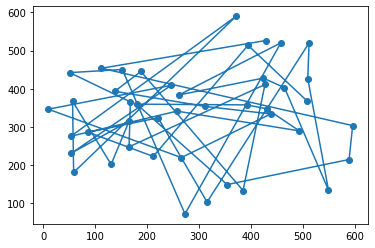

In [43]:
print (optimalLength)




citys['order']=initialPath
citys_order=citys.sort_values(by=['order'])
plt.scatter(citys_order['x'],citys_order['y'])
plt.plot(citys_order['x'],citys_order['y']) 